In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import *

In [3]:
captura_triangulo = "triangulo.jpg"

In [4]:
imagem = cv2.imread(captura_triangulo)
imagem = reprojeta(imagem)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_gray = np.array(imagem_gray, dtype=np.float32)

In [5]:
imagem_gray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
r_0 = cv2.cornerHarris(imagem_gray, 7, 3, 0.015)

In [7]:
r_0.max()

5765742.5

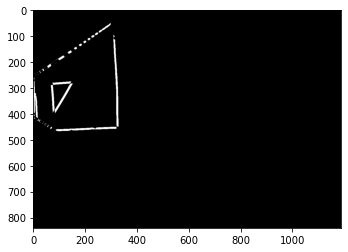

In [8]:
plt.imshow(r_0<-4000,  cmap='gray')

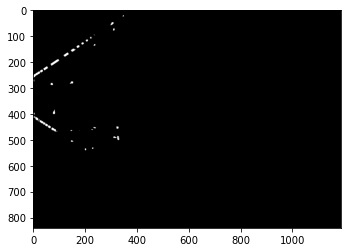

In [9]:
plt.imshow(r_0>4000, cmap='gray')

In [10]:
cantos = cv2.goodFeaturesToTrack(imagem_gray, 3, 0.01, 10)
cantos = cantos.reshape((len(cantos), 2))

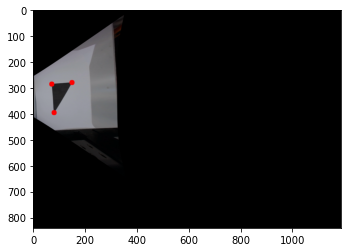

In [11]:
for n in cantos:
    cv2.circle(imagem, tuple(n.astype('int')), 10, (255,0,0), -1)
plt.imshow(imagem)

In [12]:
matcher = cv2.BFMatcher(normType=cv2.NORM_L2, crossCheck=False)
captura_triangulo_2 = "triangulo2.jpg"
imagem_2 = cv2.imread(captura_triangulo_2)
imagem_2 = reprojeta(imagem_2)
imagem_gray_2 = cv2.cvtColor(imagem_2, cv2.COLOR_BGR2GRAY)
imagem_gray_2 = np.array(imagem_gray_2, dtype=np.float32)
cantos_2 = cv2.goodFeaturesToTrack(imagem_gray_2, 3, 0.01, 10)
cantos_2 = cantos_2.reshape((len(cantos_2), 2))
matches = matcher.match(cantos_2, cantos)
kp1 = np.array([cv2.KeyPoint(*x, 3) for x in cantos])
kp2 = np.array([cv2.KeyPoint(*x, 3) for x in cantos_2])

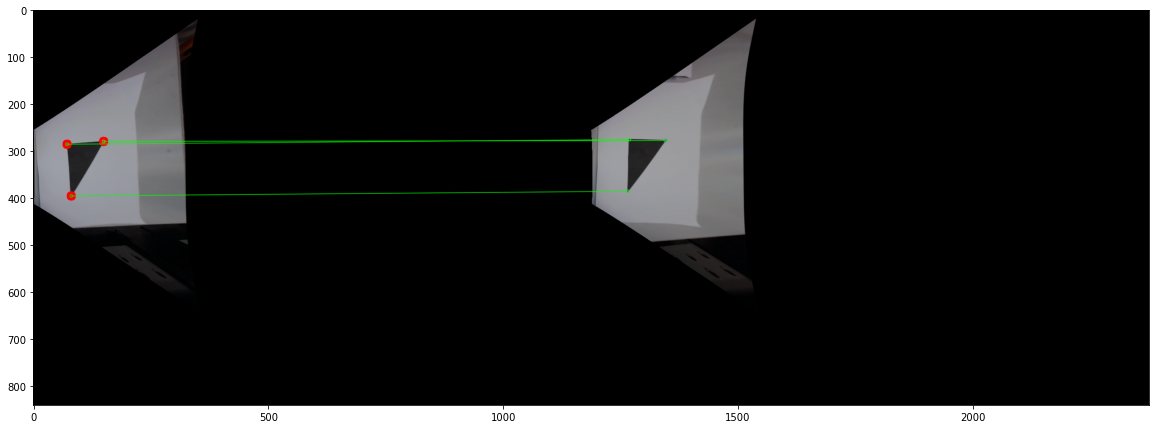

In [13]:
imagem_match = cv2.drawMatches(imagem,kp1,imagem_2,kp2,matches,None,matchColor=(0,255,0))

plt.figure(figsize = (20,20))
plt.imshow(imagem_match)

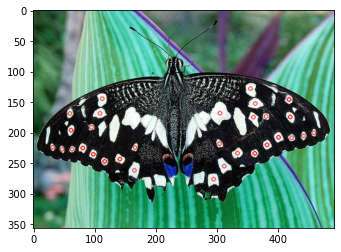

In [14]:
borboleta = cv2.imread("borboleta.jpg")

surf = cv2.xfeatures2d.SURF_create(60000)
kp1, desc1 = surf.detectAndCompute(borboleta, None)
nova_borboleta = cv2.drawKeypoints(borboleta, kp1, borboleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_borboleta)

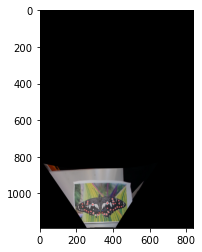

In [15]:
brabuleta = reprojeta(cv2.imread("brabuleta.jpg"))
brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_90_COUNTERCLOCKWISE)

surf.setHessianThreshold(15000)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_brabuleta)

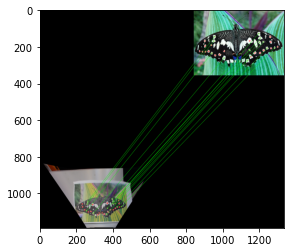

In [16]:
matches = matcher.knnMatch(desc2, desc1, k=2)
matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(brabuleta, kp2, borboleta, kp1, matches, None ,**draw_params)
plt.imshow(imagem)

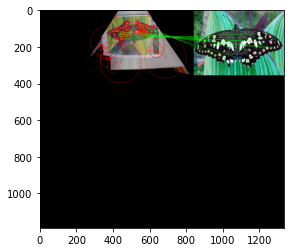

In [23]:
brabuleta = reprojeta(cv2.imread("brabuleta.jpg"))

brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_90_COUNTERCLOCKWISE)
brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_180)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), flags=5)
plt.imshow(nova_brabuleta)

matches = matcher.knnMatch(desc2, desc1, k=2)
matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(brabuleta, kp2, borboleta, kp1, matches, None ,**draw_params)
plt.imshow(imagem)

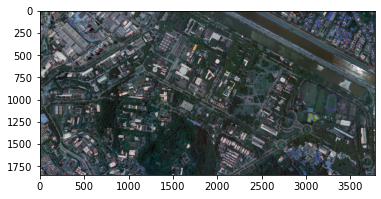

In [18]:
ciduniv = cv2.imread("ciduniv.png")

surf = cv2.xfeatures2d.SURF_create(10000)
kp_uni, desc_uni = surf.detectAndCompute(ciduniv, None)
nova_ciduniv = cv2.drawKeypoints(ciduniv, kp_uni, ciduniv, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(ciduniv)

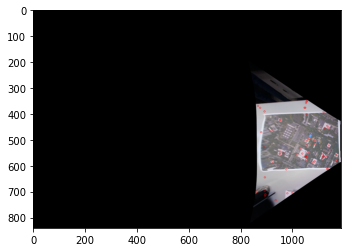

In [19]:
poli_satelite = reprojeta(cv2.imread("poli_satelite.jpg"))
poli_satelite = cv2.rotate(poli_satelite, cv2.ROTATE_180)

surf = cv2.xfeatures2d.SURF_create(4000)
kp_poli, desc_poli = surf.detectAndCompute(poli_satelite, None)
nova_ciduniv = cv2.drawKeypoints(poli_satelite, kp_poli, poli_satelite, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(poli_satelite)

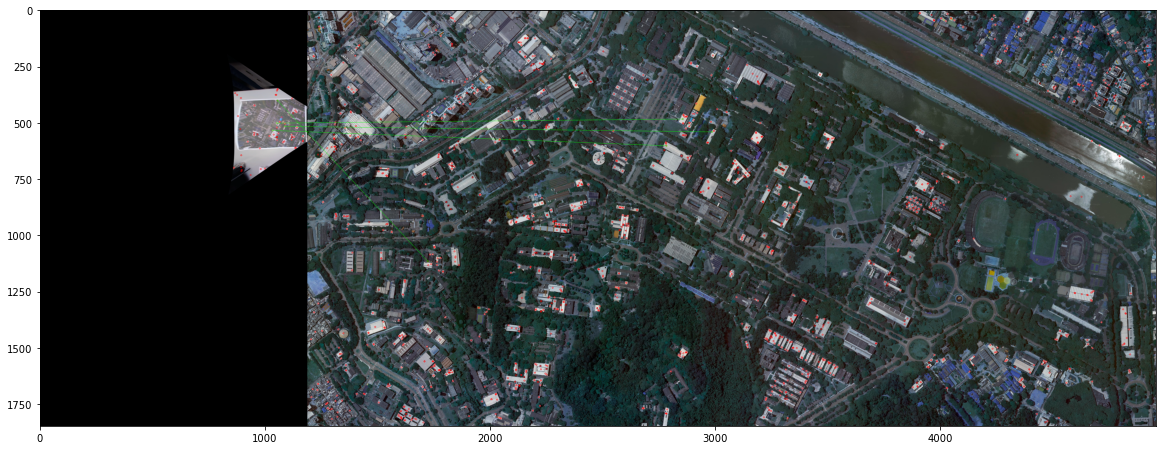

In [20]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=4)
search_params = dict(checks =50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
flann.add(np.array([desc_uni]))
flann.train()
matches = flann.knnMatch(desc_poli,k=2)

matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
        
        
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(poli_satelite, kp_poli, ciduniv, kp_uni, matches, None ,**draw_params)

plt.figure(figsize = (20,20))
plt.imshow(imagem)

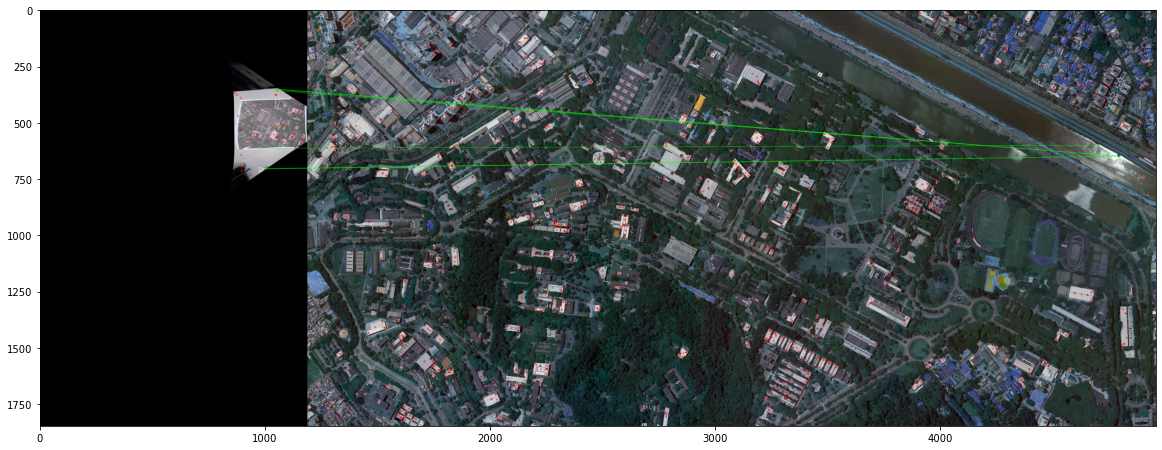

In [21]:
pt1 = np.array([kp_poli[matches[i][0].queryIdx].pt for i in range(len(matches))])
pt2 = np.array([kp_uni[matches[i][1].trainIdx].pt for i in range(len(matches))])

matriz, mascara = cv2.estimateAffinePartial2D(pt1, pt2)

Mtrans = np.eye(3)
Mtrans[:2,:] = matriz
a = np.dot(Mtrans, np.array([930,840,1]))[:2].astype('int32')
b = np.dot(Mtrans, np.array([0,0,1]))[:2].astype('int32')
c = np.dot(Mtrans, np.array([0,840,1]))[:2].astype('int32')
d = np.dot(Mtrans, np.array([930,0,1]))[:2].astype('int32')
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=mascara,
                flags=cv2.DrawMatchesFlags_DEFAULT)

cidunivC = ciduniv.copy()
cv2.line(cidunivC, tuple(a), tuple(c), (0,0,255), 10)
cv2.line(cidunivC, tuple(c), tuple(b), (0,0,255), 10)
cv2.line(cidunivC, tuple(b), tuple(d), (0,0,255), 10)
cv2.line(cidunivC, tuple(d), tuple(a), (0,0,255), 10)

mm = []
for n in matches:
    mm.append(n[0])

imagem = cv2.drawMatches(poli_satelite, kp_poli, cidunivC, kp_uni, mm, None ,**draw_params)

plt.figure(figsize = (20,20))
plt.imshow(imagem)

Considerando a translação e escala do remapeamento da imagem do campus da Poli, quais as coordenadas nesta imagem da origem do sistema global de coordenadas?

In [ ]:
x,_ = global2camera([0,0,0])
x

Dado o resultado do RANSAC, quais as coordenadas na imagem do campus da USP correspondentes à origem do sistema global de coordenadas?

In [ ]:
np.dot(Mtrans, np.array(x))[:2].astype('int32')